In [35]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('../../python/DS/task2/howpop_train.csv')

In [37]:
df.shape

(134137, 17)

In [38]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [39]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [41]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/124422/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [172]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (30, 15), "axes.titlesize" : 18 })

In [43]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


In [44]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 18 columns):
url            134137 non-null object
domain         134137 non-null object
post_id        134137 non-null int64
published      134137 non-null datetime64[ns]
author         97657 non-null object
flow           97048 non-null object
polling        134137 non-null bool
content_len    134137 non-null int64
title          134137 non-null object
comments       134137 non-null int64
favs           134137 non-null int64
views          134137 non-null int64
votes_plus     133566 non-null float64
votes_minus    133566 non-null float64
year           134137 non-null int64
month          134137 non-null int64
dayofweek      134137 non-null int64
hour           134137 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(9), object(5)
memory usage: 17.5+ MB


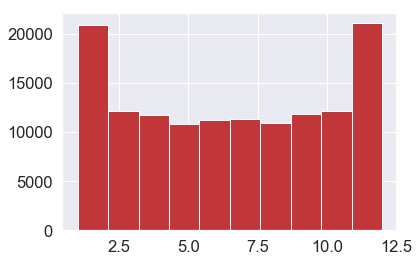

In [46]:
df["month"].hist();

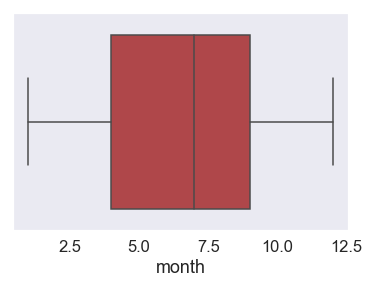

In [47]:
sns.boxplot(df["month"]);

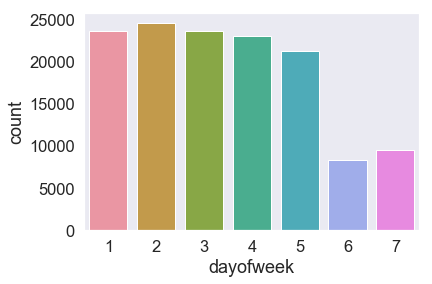

In [48]:
sns.countplot(df["dayofweek"]);

In [51]:
df["year"].value_counts()

2015    23452
2016    16316
2014    16180
2012    15972
2013    15537
2011    15063
2010    13091
2009    10783
2008     7743
Name: year, dtype: int64

In [61]:
df[df["year"] == 2016]["month"].value_counts()

3     2115
4     1910
2     1819
5     1726
1     1717
6     1498
10    1493
9     1482
7     1278
8     1278
Name: month, dtype: int64

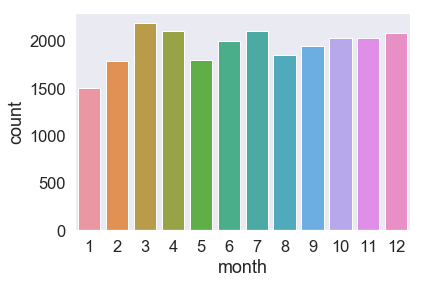

In [67]:
sns.countplot(df[df["year"]==2015]["month"])

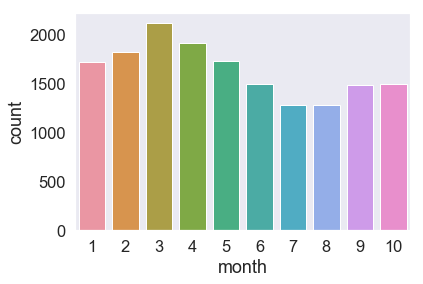

In [64]:
sns.countplot(df[df["year"]==2016]["month"])

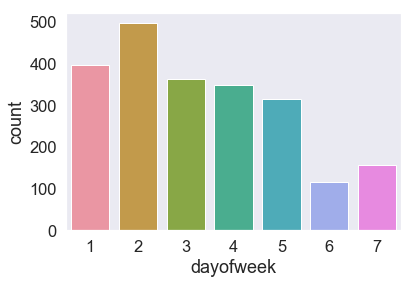

In [68]:
sns.countplot(df[(df["year"]==2015) & (df["month"]==3)]["dayofweek"])

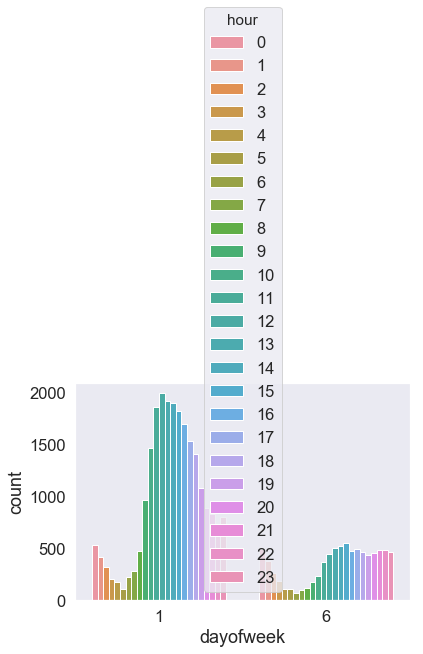

In [119]:
sns.countplot(x=df[(df["dayofweek"]==1) | (df["dayofweek"]==6)]["dayofweek"], hue='hour', data=df);

In [ ]:
#sns.countplot(x=df["views"], hue="hour", data = df);

In [91]:
df.groupby("hour")[["comments"]].sum()

,comments
hour,
0,197379
1,155617
2,110935
3,82767
4,59023
5,40692
6,54286
7,62213
8,92666


In [94]:
df[df["domain"] == "geektimes.ru"].groupby("hour")[["comments"]].sum()

,comments
hour,
0,76849
1,61396
2,41697
3,31688
4,21088
5,13182
6,23975
7,20063
8,30932


In [111]:
df["views"].value_counts
df.groupby('Platform')[['Global_Sales']].sum()

KeyError: 'Platform'

In [115]:
df.groupby("author")[["votes_minus"]].sum().sort_values(by='votes_minus', ascending=False)

,votes_minus
author,
@alizar,41734.0
@marks,18059.0
@Mithgol,11367.0
@XaocCPS,9111.0
@SLY_G,8293.0
@aleksandrit,6294.0
@Boomburum,6185.0
@jeston,5117.0
@Mordatyj,4057.0


In [105]:
#sns.countplot(x=df["author"],  data=df);

In [128]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
df = pd.read_csv("../../python/DS/titanic_train.csv", 
                       index_col='PassengerId')

In [130]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Hassab, Mr. Hammad",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [133]:
df = df.drop('Cabin', axis=1).dropna()

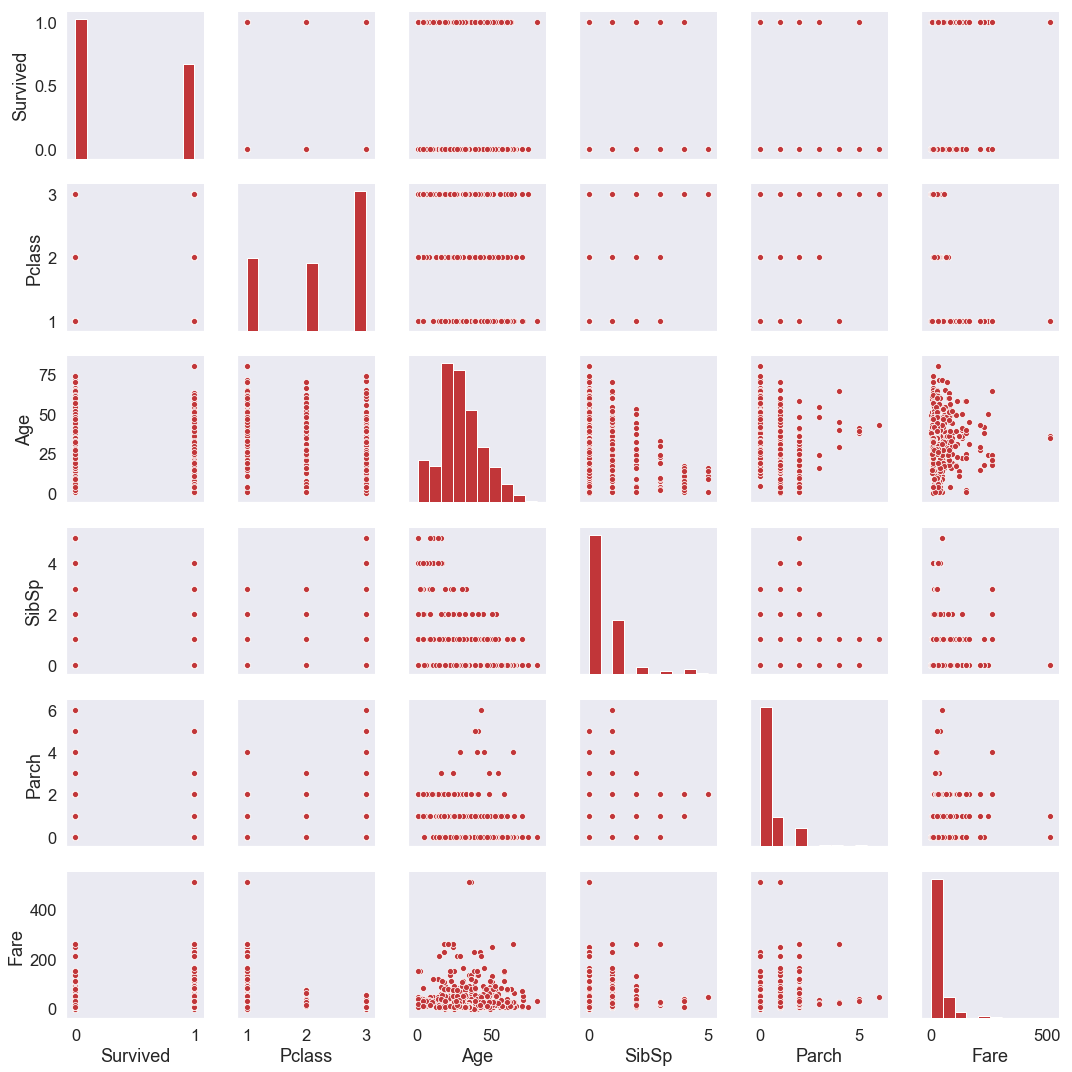

In [138]:
sns.pairplot(df)

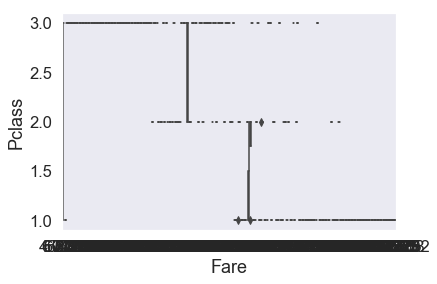

In [147]:
sns.boxplot(df["Fare"], df["Pclass"]);

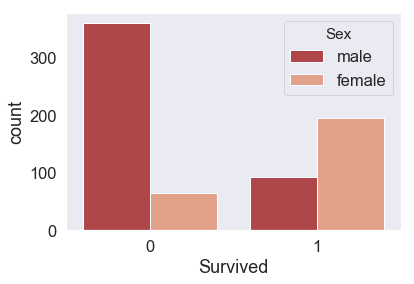

In [158]:
sns.countplot(x = df["Survived"], hue="Sex", data = df )

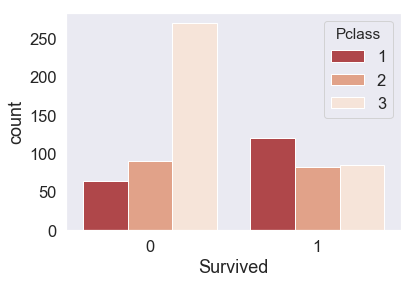

In [159]:
sns.countplot(x = df["Survived"], hue="Pclass", data = df )

In [160]:
df["ageclass"] = df["Age"].map?

In [165]:
df["ageclass"] = 

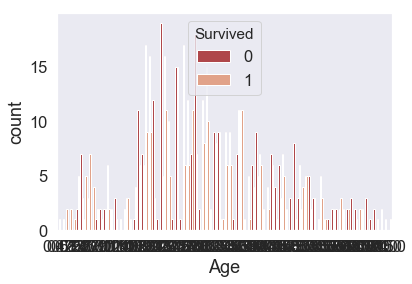

In [175]:
sns.countplot(x=df[df["Age"]<90]["Age"], hue=df["Survived"], data=df);